In [1]:
# IMPORT GENERIC PACKAGES
import pandas as pd # holds data

import numpy as np # numerical calc package

import matplotlib.pyplot as plt # plotting library

import seaborn as sns # pretty plotting

from sklearn.model_selection import train_test_split # split dataset

from sklearn.linear_model import LogisticRegression # linear model for classification

from sklearn.model_selection import cross_val_score

from sklearn import metrics

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
mushroom = pd.read_csv('../data/mushrooms_classification.csv')

In [3]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


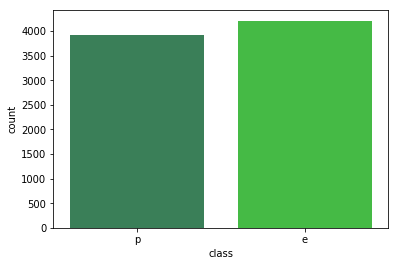

In [4]:
colours = ["seagreen", "limegreen"]

x = mushroom['class']
ax = sns.countplot(x=x, data=mushroom, palette=colours)

In [5]:
def plot_data(hue, data):
     for i, col in enumerate(data.columns):
          plt.figure(i)
          sns.set(rc={'figure.figsize':(20,10)})
          ax= sns.countplot(x=data[col], hue=hue, data=data, palette=colours)

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


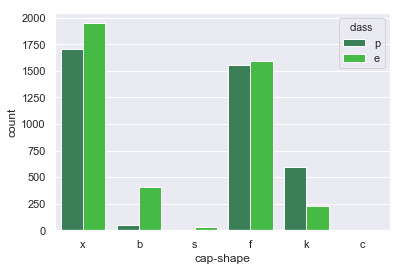

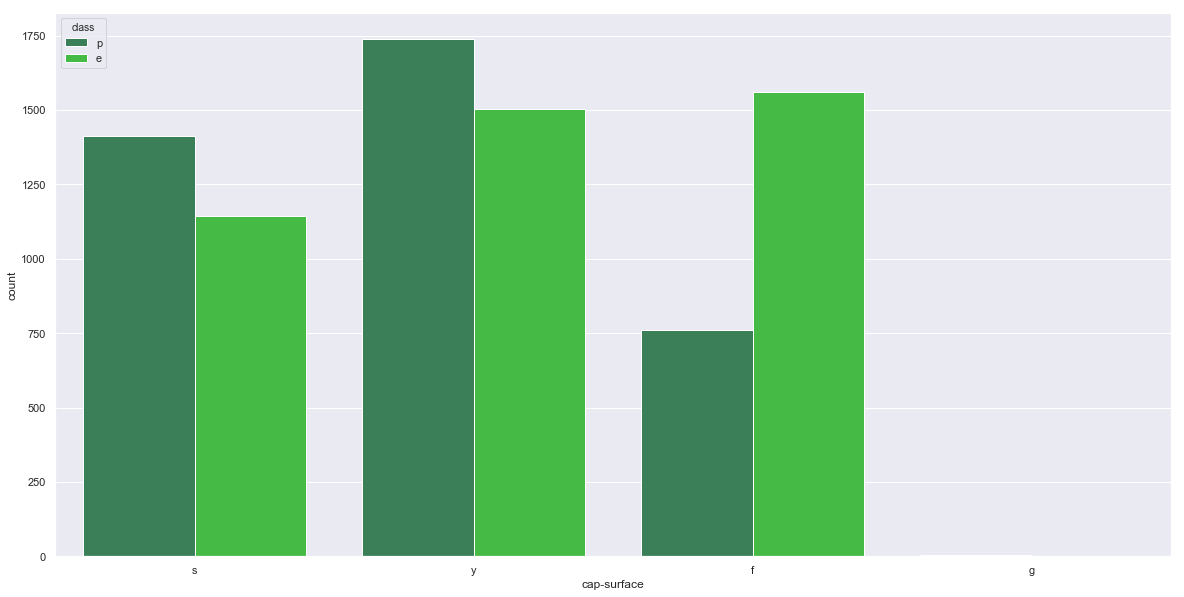

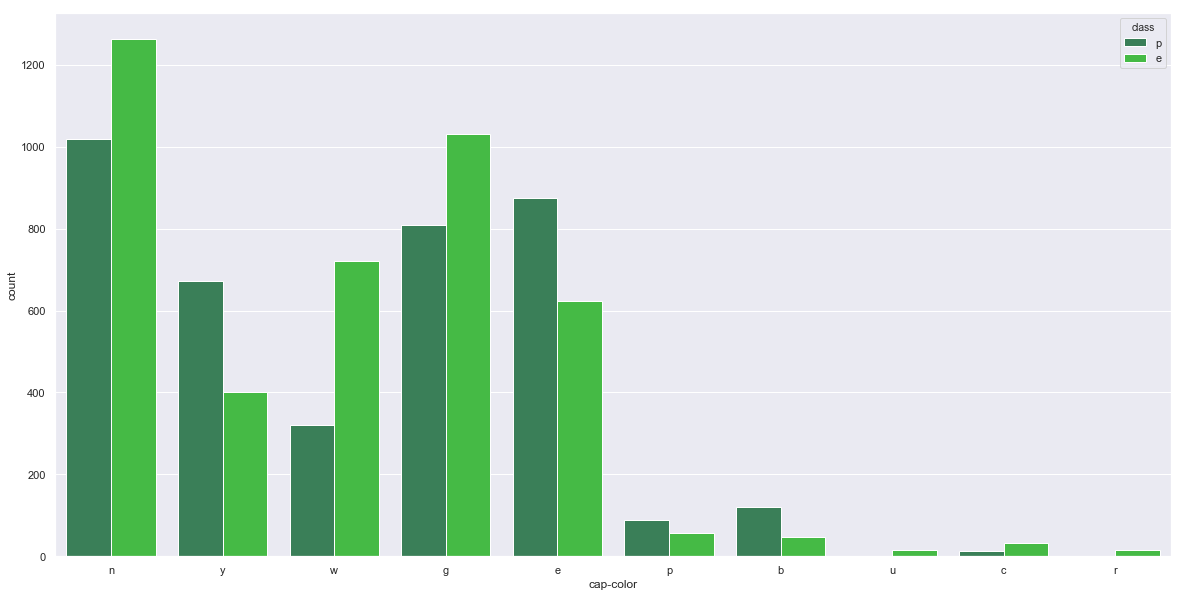

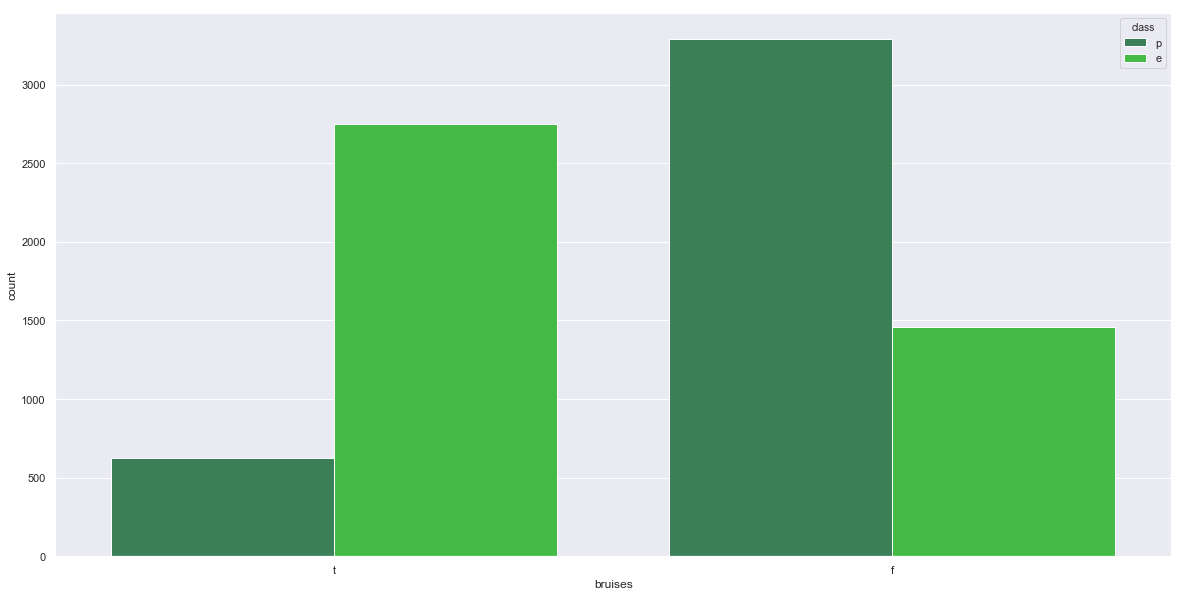

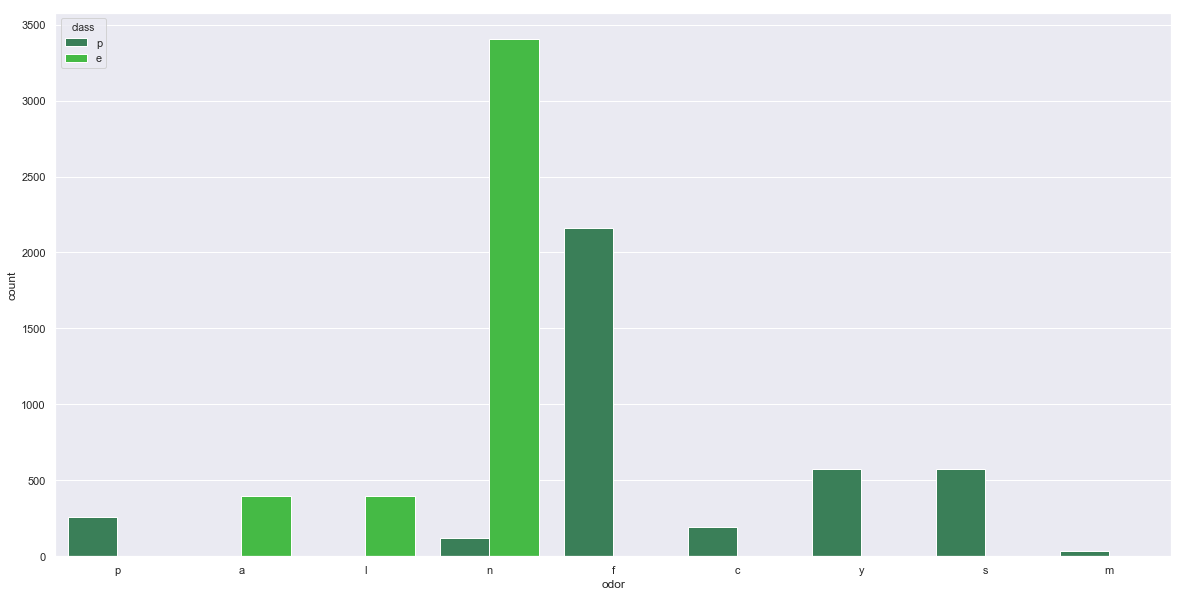

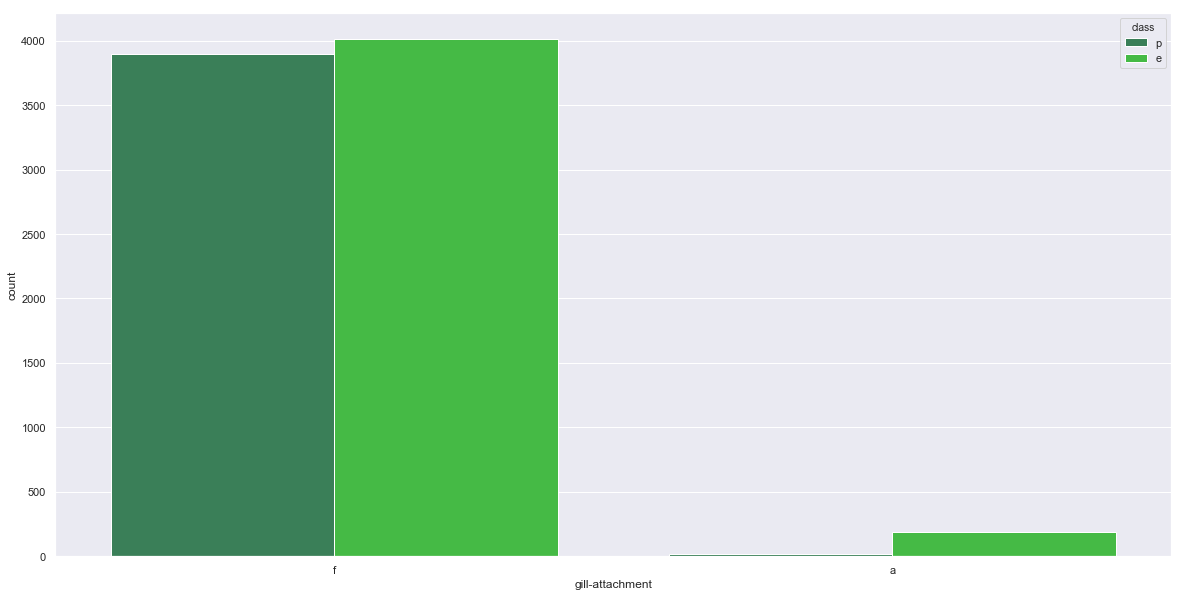

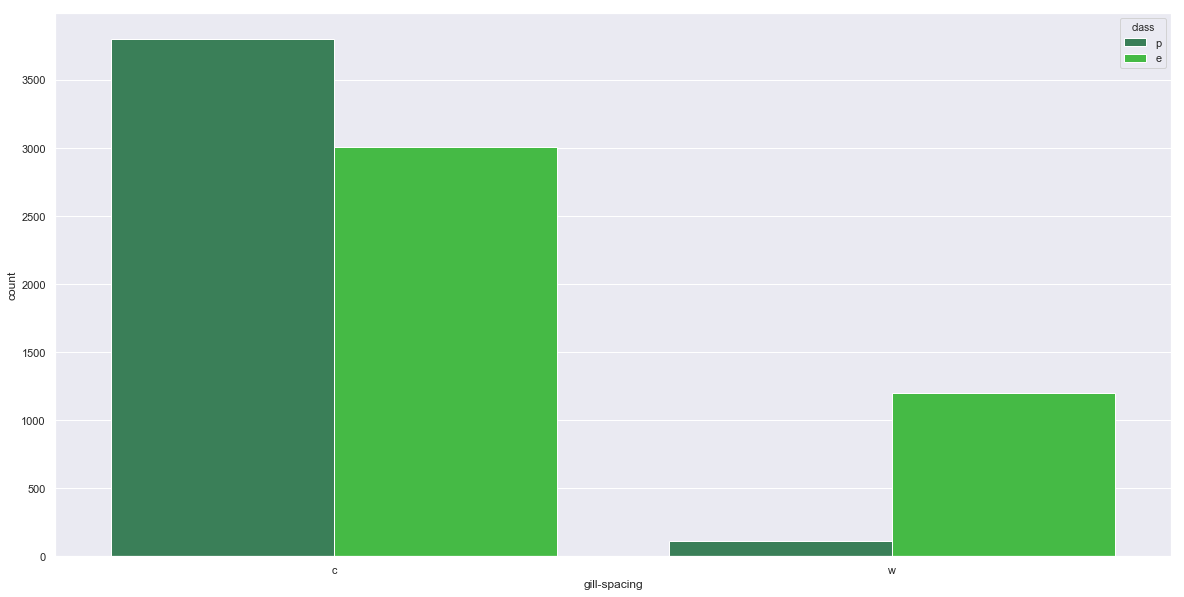

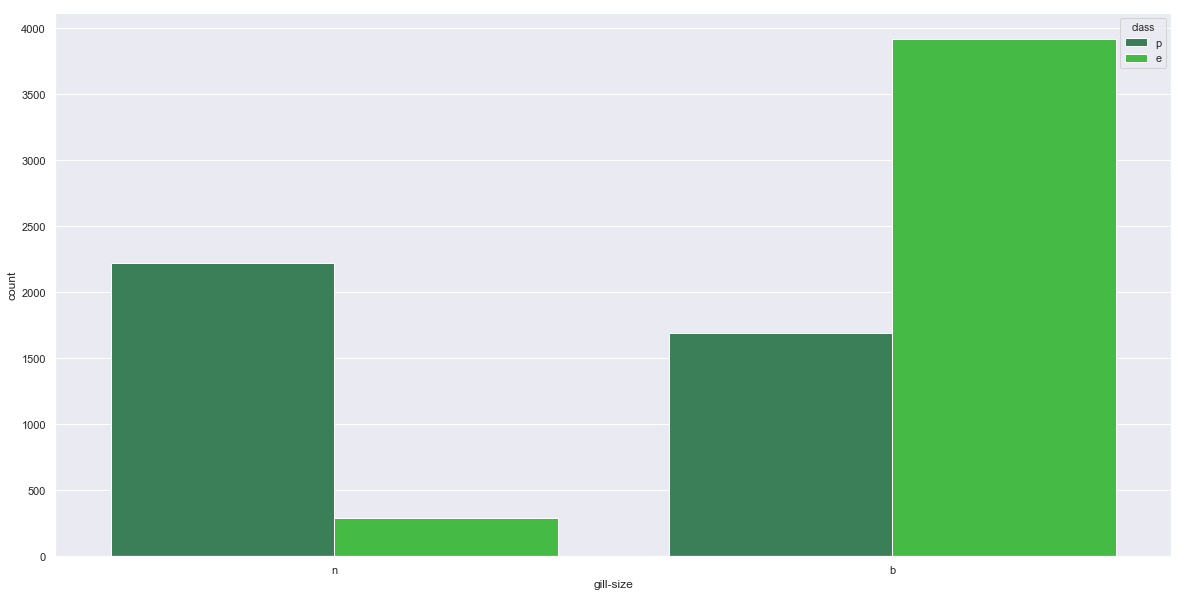

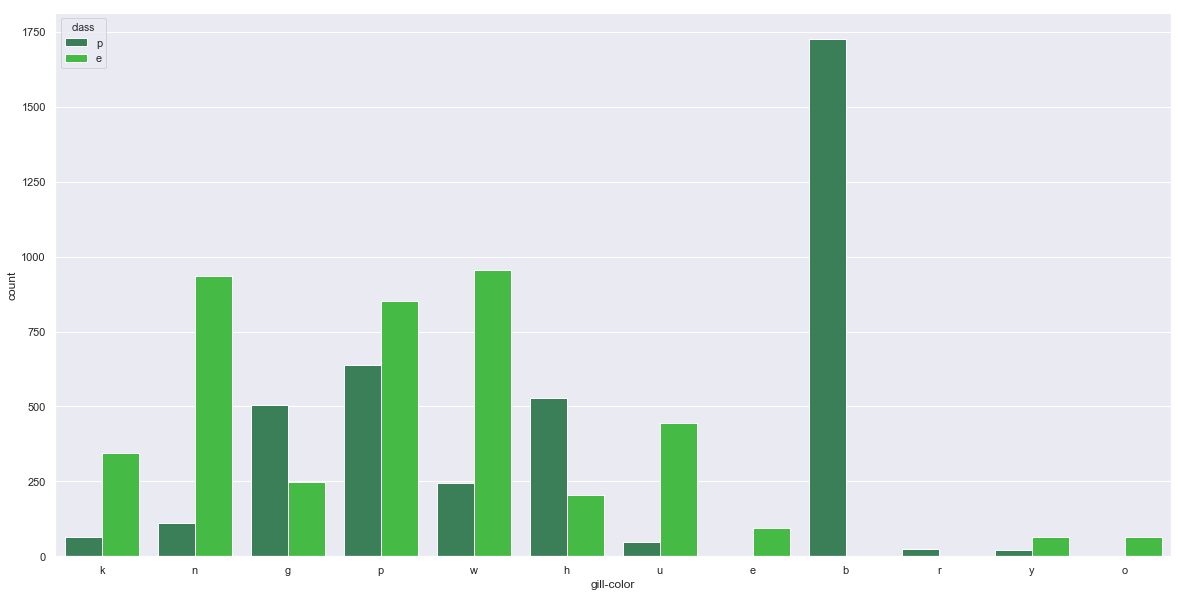

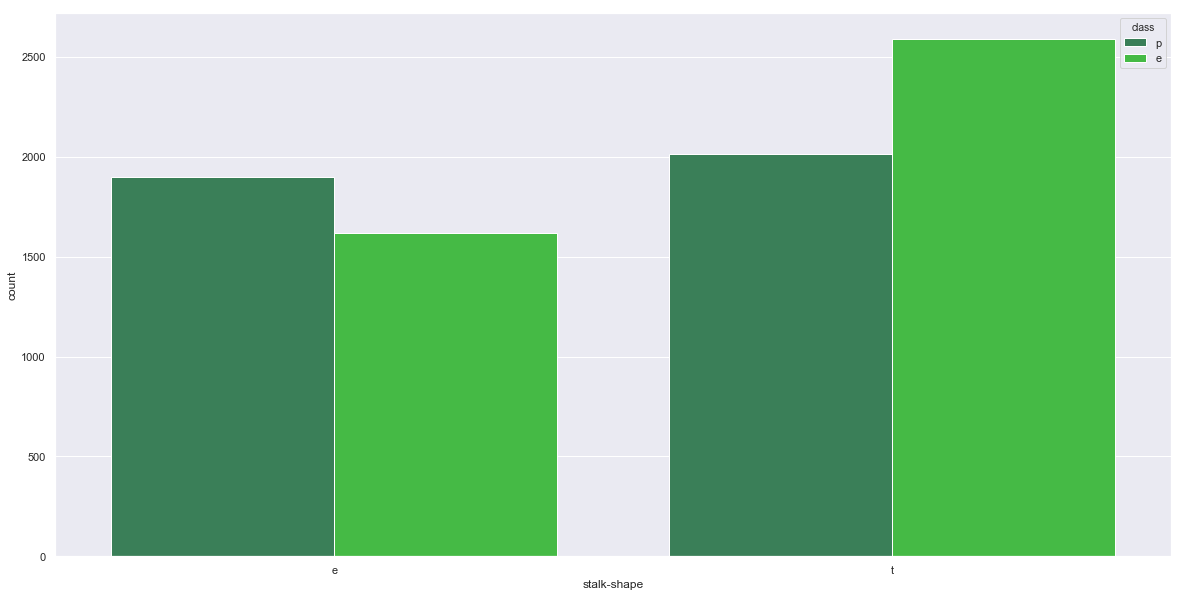

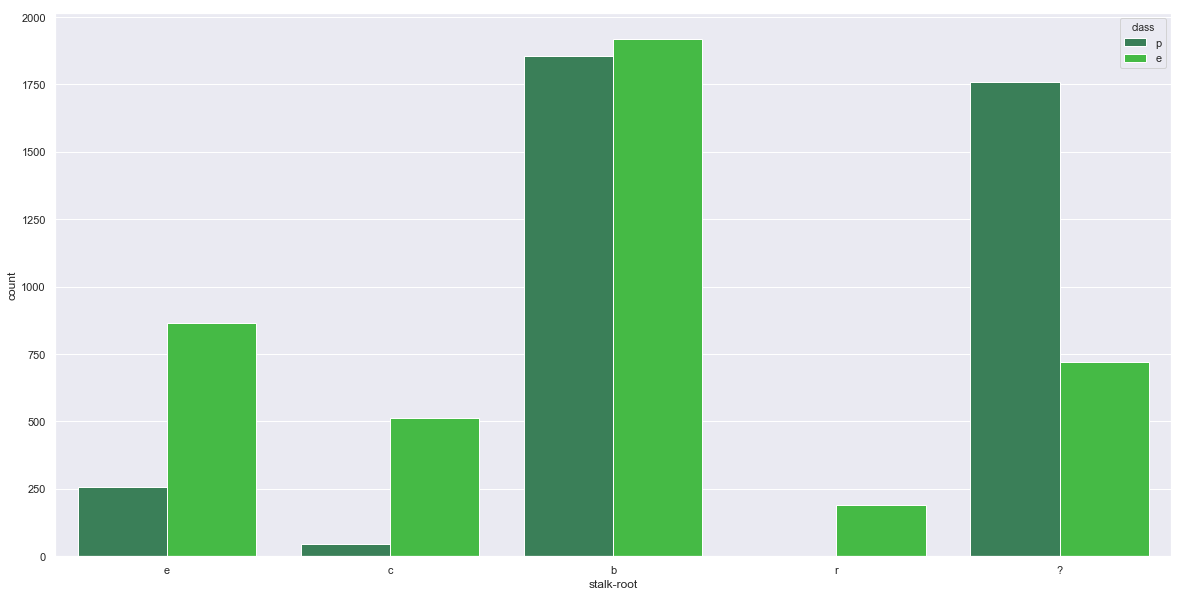

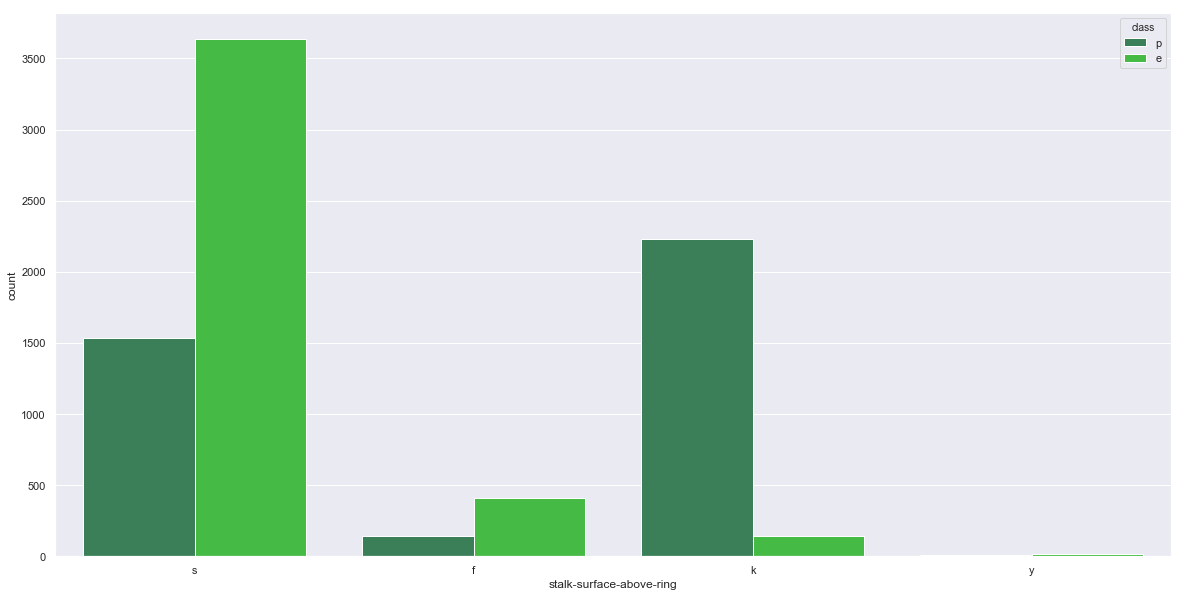

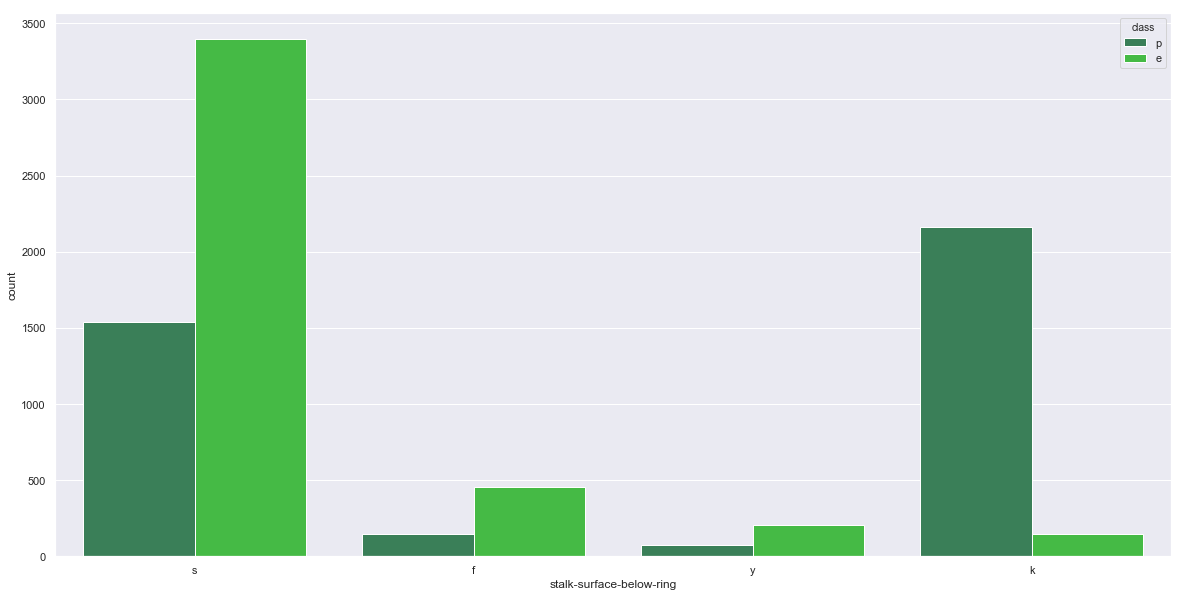

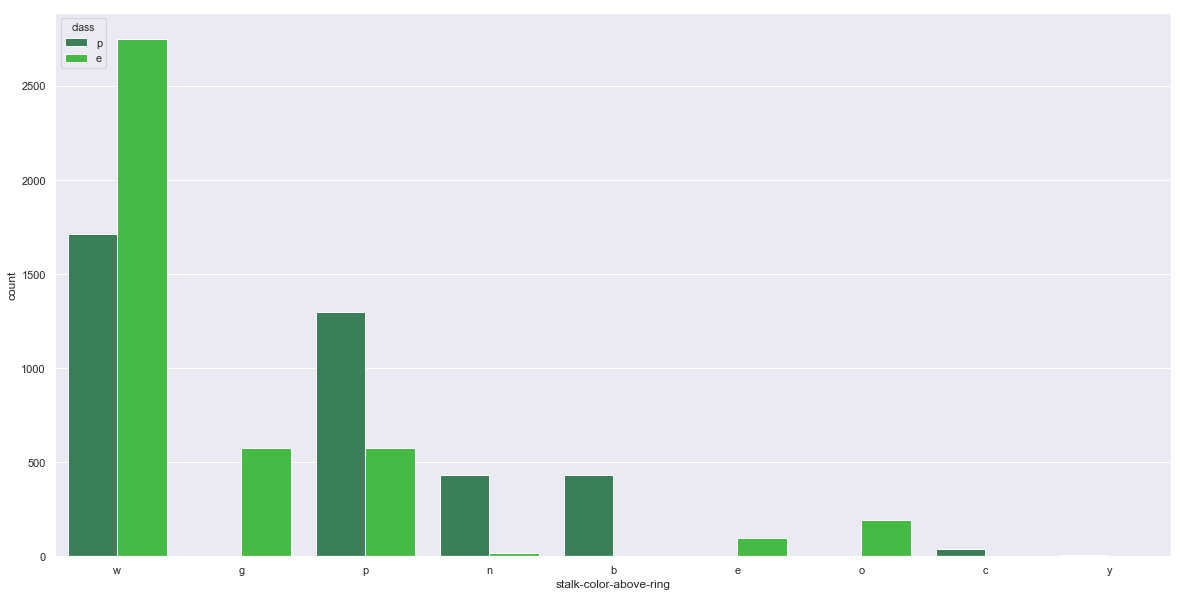

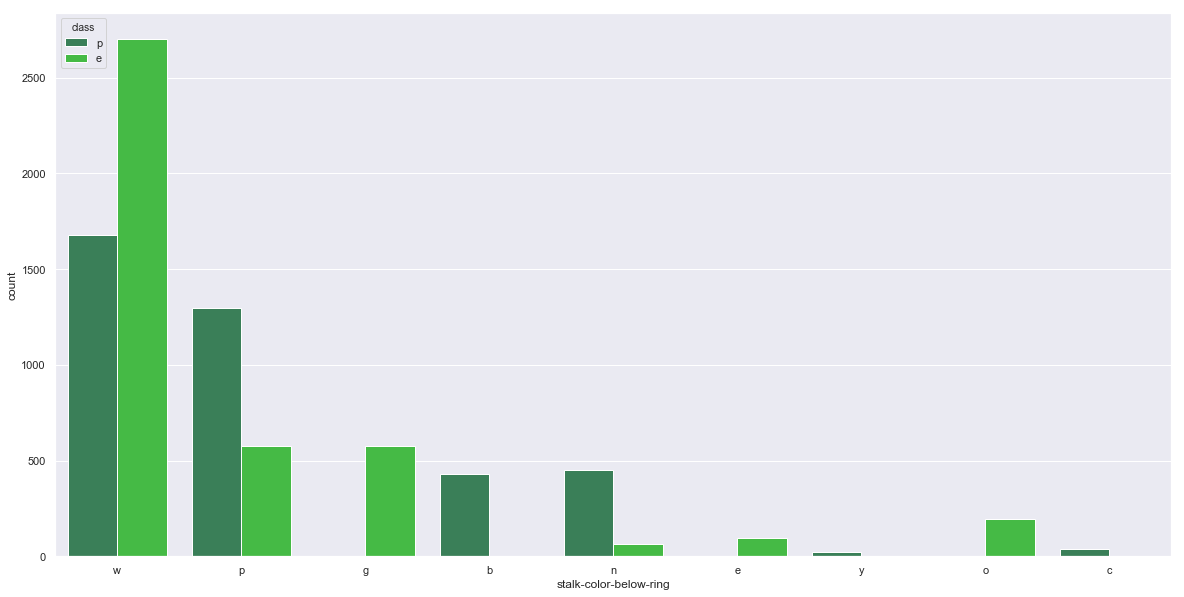

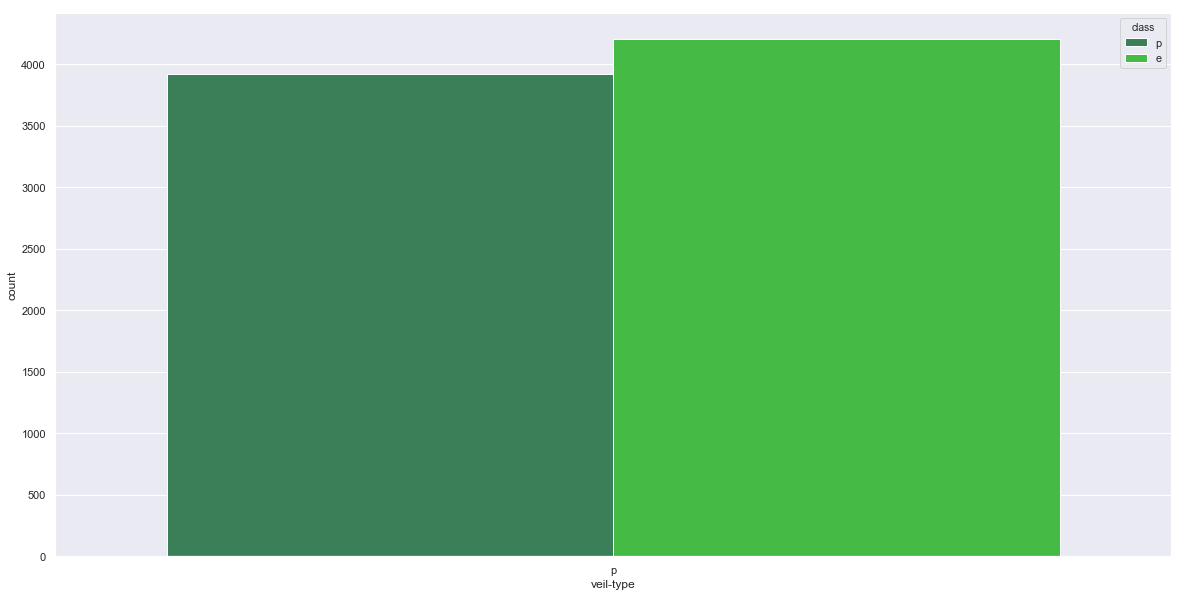

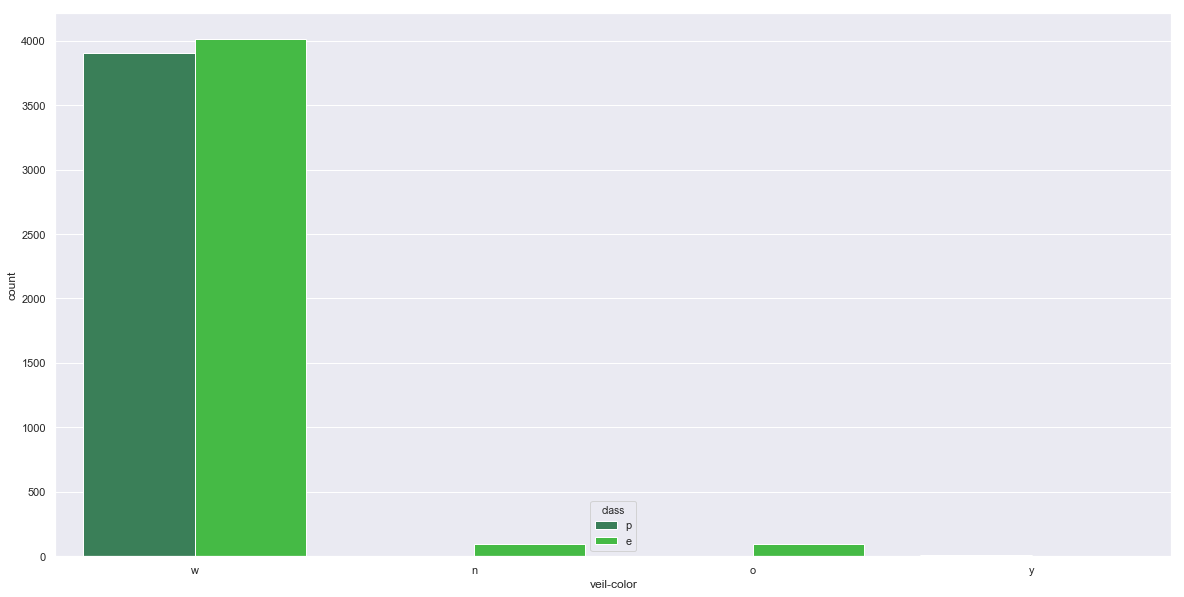

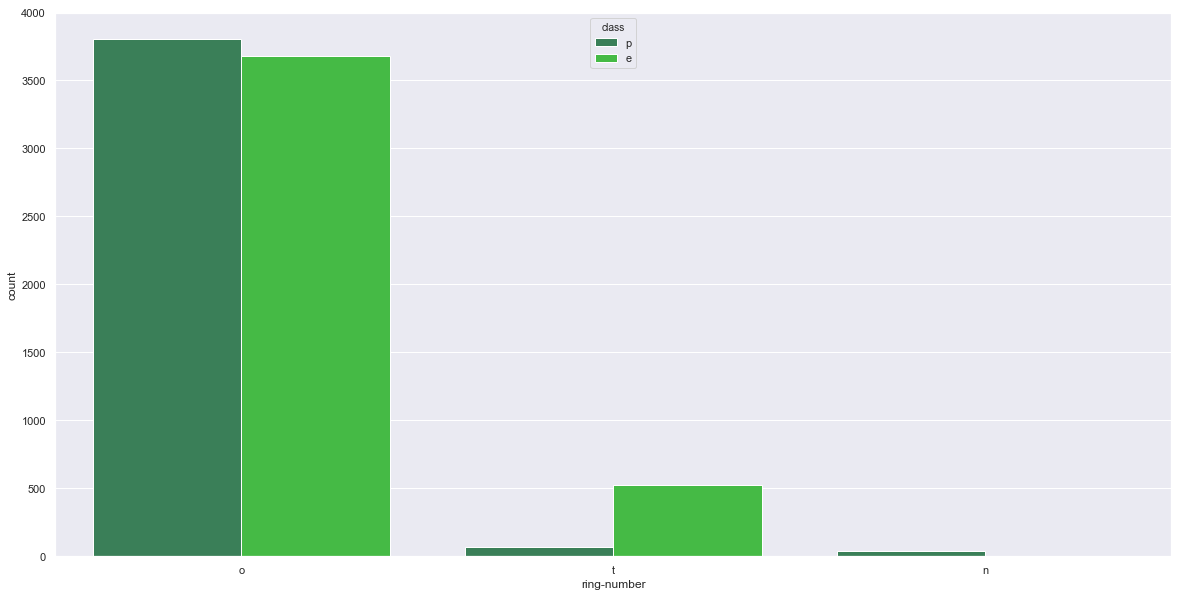

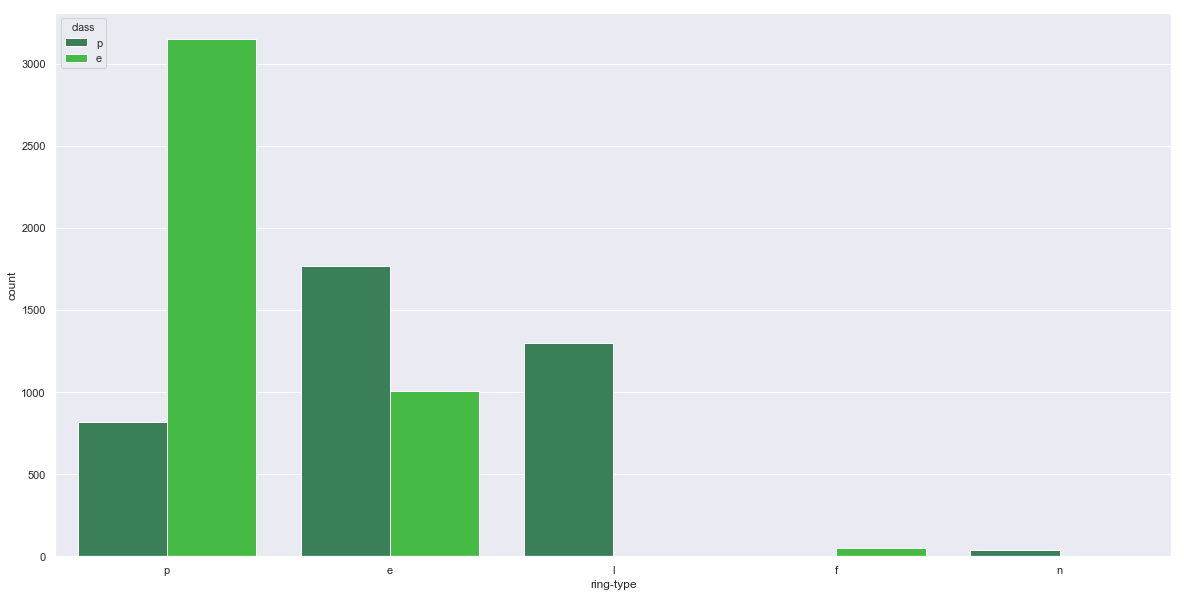

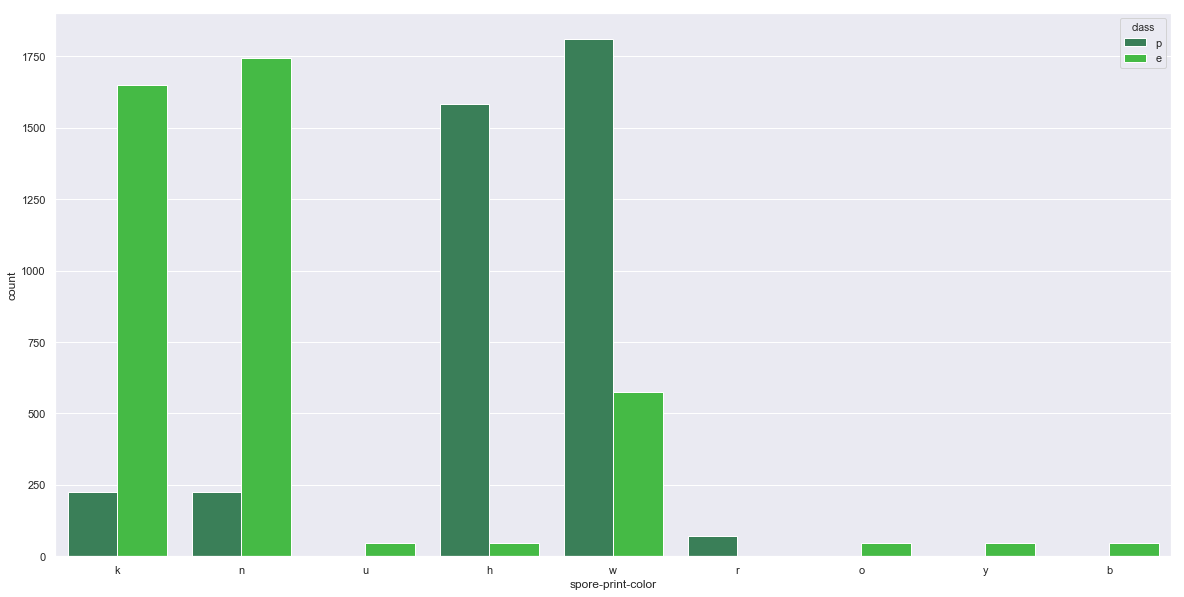

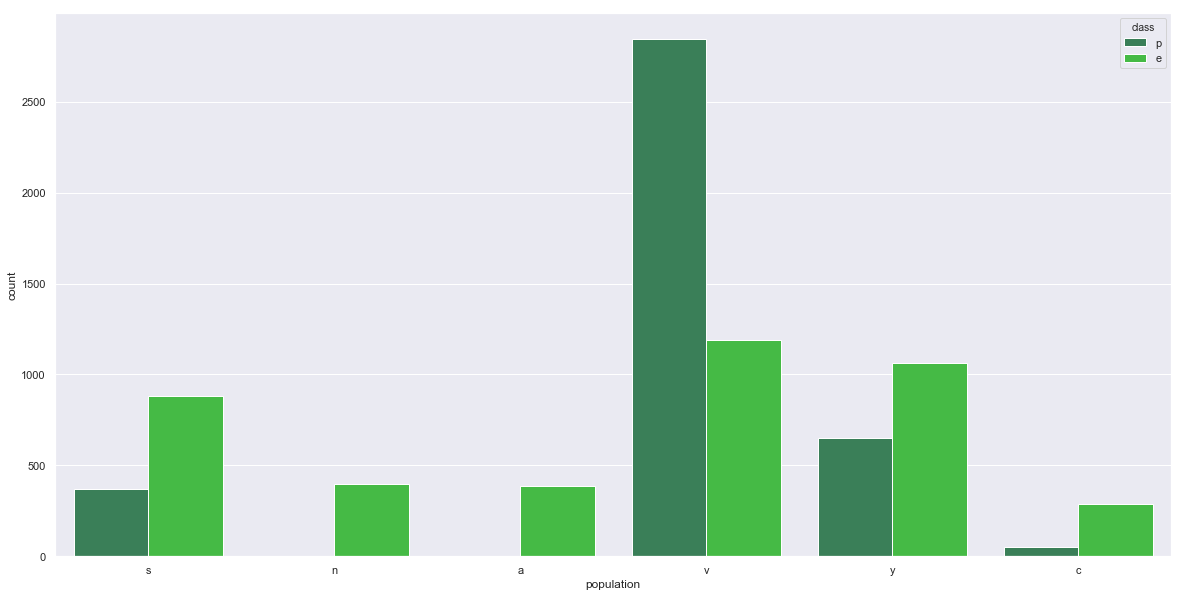

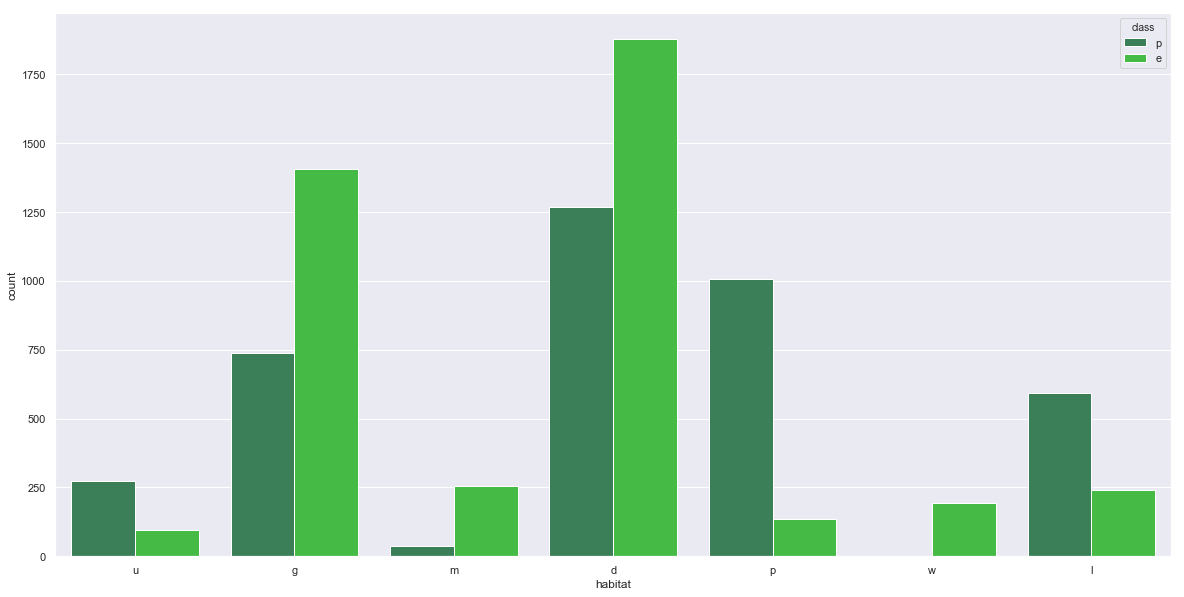

In [6]:
hue = mushroom['class']
data_for_plot = mushroom.drop('class',1)

plot_data(hue, data_for_plot)

In [7]:
for col in mushroom.columns:
    print("{} : {}".format(col, mushroom[col].isnull().sum()))

class : 0
cap-shape : 0
cap-surface : 0
cap-color : 0
bruises : 0
odor : 0
gill-attachment : 0
gill-spacing : 0
gill-size : 0
gill-color : 0
stalk-shape : 0
stalk-root : 0
stalk-surface-above-ring : 0
stalk-surface-below-ring : 0
stalk-color-above-ring : 0
stalk-color-below-ring : 0
veil-type : 0
veil-color : 0
ring-number : 0
ring-type : 0
spore-print-color : 0
population : 0
habitat : 0


In [8]:
le = LabelEncoder()
mushroom['class'] = le.fit_transform(mushroom['class'])

mushroom.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
encoded_mushroom = pd.get_dummies(mushroom)

encoded_mushroom.head(5)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [10]:
features = ['cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f',
       'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_b',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_f', 'bruises_t', 'odor_a', 'odor_c',
       'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s',
       'odor_y', 'gill-attachment_a', 'gill-attachment_f',
       'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n',
       'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h',
       'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p',
       'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y',
       'stalk-shape_e', 'stalk-shape_t', 'stalk-root_?', 'stalk-root_b',
       'stalk-root_c', 'stalk-root_e', 'stalk-root_r',
       'stalk-surface-above-ring_f', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_f', 'stalk-surface-below-ring_k',
       'stalk-surface-below-ring_s', 'stalk-surface-below-ring_y',
       'stalk-color-above-ring_b', 'stalk-color-above-ring_c',
       'stalk-color-above-ring_e', 'stalk-color-above-ring_g',
       'stalk-color-above-ring_n', 'stalk-color-above-ring_o',
       'stalk-color-above-ring_p', 'stalk-color-above-ring_w',
       'stalk-color-above-ring_y', 'stalk-color-below-ring_b',
       'stalk-color-below-ring_c', 'stalk-color-below-ring_e',
       'stalk-color-below-ring_g', 'stalk-color-below-ring_n',
       'stalk-color-below-ring_o', 'stalk-color-below-ring_p',
       'stalk-color-below-ring_w', 'stalk-color-below-ring_y',
       'veil-type_p', 'veil-color_n', 'veil-color_o', 'veil-color_w',
       'veil-color_y', 'ring-number_n', 'ring-number_o', 'ring-number_t',
       'ring-type_e', 'ring-type_f', 'ring-type_l', 'ring-type_n',
       'ring-type_p', 'spore-print-color_b', 'spore-print-color_h',
       'spore-print-color_k', 'spore-print-color_n',
       'spore-print-color_o', 'spore-print-color_r',
       'spore-print-color_u', 'spore-print-color_w',
       'spore-print-color_y', 'population_a', 'population_c',
       'population_n', 'population_s', 'population_v', 'population_y',
       'habitat_d', 'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p',
       'habitat_u', 'habitat_w']

y = mushroom['class'].values.reshape(-1,1)

X = encoded_mushroom[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X.columns.values

array(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c',
       'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p',
       'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y',
       'bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l',
       'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y',
       'gill-attachment_a', 'gill-attachment_f', 'gill-spacing_c',
       'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_b',
       'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k',
       'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r',
       'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_e',
       'stalk-shape_t', 'stalk-root_?', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_f',
       'stalk-surface-above-ring_k

In [11]:
encoded_mushroom.columns.values

array(['class', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f',
       'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_b',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_f', 'bruises_t', 'odor_a', 'odor_c',
       'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s',
       'odor_y', 'gill-attachment_a', 'gill-attachment_f',
       'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n',
       'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h',
       'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p',
       'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y',
       'stalk-shape_e', 'stalk-shape_t', 'stalk-root_?', 'stalk-root_b',
       'stalk-root_c', 'stalk-root_e', 'stalk-root_r',
       'stalk-surface-above-ring_f', 'stalk-surface-abo

In [12]:
logistc_reg = LogisticRegression()

logistc_reg.fit(X_train, y_train.ravel())

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
X_train.describe()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,...,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000
mean,0.054316,0.000462,0.380366,0.105862,0.004154,0.454839,0.284044,0.000462,0.315125,0.400369,...,0.152331,0.495153,0.211417,0.386675,0.263887,0.104478,0.036006,0.139252,0.044315,0.025389
std,0.226658,0.021482,0.485514,0.307685,0.064326,0.497995,0.450992,0.021482,0.464602,0.490011,...,0.359369,0.500015,0.408345,0.487026,0.440773,0.305903,0.186318,0.346236,0.205809,0.157314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
y_prob = logistc_reg.predict_proba(X_test)[: , 1]
y_pred = np.where(y_prob > 0.5, 1, 0)

In [15]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[843,   0],
       [  0, 782]])

In [16]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)

auc_roc

1.0

In [17]:
X_train.corr()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
cap-shape_b,1.000000,-0.005150,-0.187769,-0.082463,-0.015479,-0.218906,-0.093744,-0.005150,0.113640,-0.021242,...,0.162912,-0.164019,-0.119102,-0.177744,0.147645,0.006924,0.369115,-0.094434,-0.051607,-0.038681
cap-shape_c,-0.005150,1.000000,-0.016837,-0.007394,-0.001388,-0.019629,-0.013536,0.333025,-0.014577,0.011680,...,-0.009110,-0.021283,-0.011127,-0.017063,-0.012867,0.062916,-0.004153,-0.008644,-0.004628,-0.003468
cap-shape_f,-0.187769,-0.016837,1.000000,-0.269589,-0.050605,-0.715649,0.065253,-0.002082,-0.092778,0.028001,...,-0.075468,0.030417,0.109741,0.072333,-0.025405,-0.046906,-0.127602,0.024506,0.036123,-0.011607
cap-shape_k,-0.082463,-0.007394,-0.269589,1.000000,-0.022224,-0.314294,-0.161278,0.015889,0.132624,0.021992,...,-0.090193,0.173387,-0.173263,-0.100677,-0.112969,0.238912,-0.066499,0.099957,-0.074094,0.119332
cap-shape_s,-0.015479,-0.001388,-0.050605,-0.022224,1.000000,-0.058997,0.102545,-0.001388,-0.043813,-0.052778,...,-0.027381,0.007803,0.036862,-0.051285,-0.038672,-0.022062,-0.012483,-0.025979,0.299949,-0.010425
cap-shape_x,-0.218906,-0.019629,-0.715649,-0.314294,-0.058997,1.000000,0.066032,-0.019629,-0.036923,-0.024905,...,0.059084,-0.062219,0.049986,0.079942,0.032917,-0.104896,-0.000717,-0.038941,-0.004495,-0.043312
cap-surface_f,-0.093744,-0.013536,0.065253,-0.161278,0.102545,0.066032,1.000000,-0.013536,-0.427253,-0.514681,...,-0.023931,-0.122876,0.207846,0.193517,0.093570,-0.197293,-0.121730,-0.094671,-0.017914,-0.101661
cap-surface_g,-0.005150,0.333025,-0.002082,0.015889,-0.001388,-0.019629,-0.013536,1.000000,-0.014577,-0.017560,...,-0.009110,-0.021283,-0.011127,-0.017063,-0.012867,0.062916,-0.004153,-0.008644,-0.004628,-0.003468
cap-surface_s,0.113640,-0.014577,-0.092778,0.132624,-0.043813,-0.036923,-0.427253,-0.014577,1.000000,-0.554274,...,0.188976,0.021812,-0.341489,-0.306675,0.113896,0.196023,0.087576,-0.036534,0.124320,0.063176
cap-surface_y,-0.021242,0.011680,0.028001,0.021992,-0.052778,-0.024905,-0.514681,-0.017560,-0.554274,1.000000,...,-0.156752,0.093344,0.132973,0.113412,-0.193546,-0.007033,0.029184,0.122152,-0.101183,0.033817


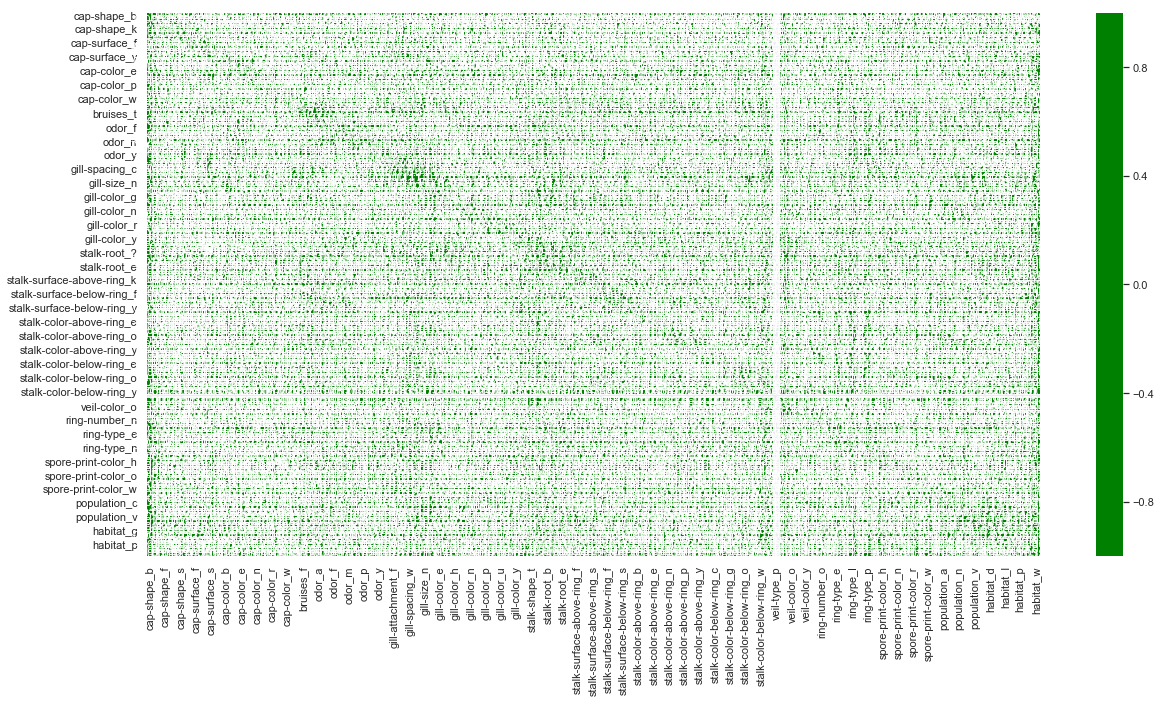

In [18]:
sns.heatmap(X_train.corr(), annot = True, cmap= ["green"])

In [19]:
# initialize model
log_reg = LogisticRegression()

# fit model
log_reg.fit(X_train, y_train)

# metrics (accuracy)
acc = log_reg.score(X_test, y_test)


# predictions
y_pred = log_reg.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
log_reg.coef_

array([[ 3.44157318e-01,  4.50594313e-01, -2.28743705e-03,
         1.33159484e-02, -5.91413672e-01, -1.37925359e-01,
        -7.64446159e-01,  5.95426870e-01,  2.51401214e-01,
        -5.94081305e-03,  9.18002388e-01, -9.62035486e-01,
         3.52430966e-02,  8.96130573e-02, -3.91715059e-01,
         8.09555203e-01, -3.73655710e-01, -4.09910306e-01,
         5.52796527e-01, -1.91452598e-01, -4.24818809e-02,
         1.18922993e-01, -2.76370710e+00,  2.67221780e+00,
         2.67193048e+00, -2.76118329e+00,  3.50854974e-01,
        -3.98590577e+00,  2.17295426e+00,  8.64185493e-01,
         8.55094261e-01, -1.06605189e-01,  1.83046301e-01,
         1.51557188e+00, -1.43913077e+00, -2.10891382e+00,
         2.18535493e+00,  1.86172402e+00, -5.37782622e-01,
        -5.68426839e-04,  9.40719252e-02, -4.07887353e-01,
        -6.06295839e-01, -1.01152932e-01, -4.76389331e-01,
         5.95165912e-01, -2.10169813e-01, -3.63000494e-01,
         2.28726066e-01,  6.95684559e-01, -6.19243447e-0

In [21]:
acc

1.0